# CSC3431 Practical 6: Stochastic Simulation

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import stocal

We define a stochastic process of the reaction system
\begin{align*}
    A + B &{\quad\stackrel{1} \longrightarrow \quad} X \\
    B + C &{\quad \stackrel{1} \longrightarrow \quad} Y
\end{align*}
by feeding a list of MassAaction reactions for the stocal.Process constructor

In [2]:
def process_factory(n=1):
    process = stocal.Process([
        stocal.MassAction({'A': 1, 'B': 1}, {'X': 1}, 1/n), 
        stocal.MassAction({'B': 1, 'C': 1}, {'Y': 1}, 1/n)
    ])
    initial = {'A': n, 'B': n, 'C': n}
    return process, initial

And we provide a utility function to generate a random sample of the stochastic process.

In stocal, the system state is represented by a dictionary that associates a non-negative integer (copy number) with each species label.

In [3]:
def sample(process, init):
    # process.trajectory initializes a random sampler
    # for the given initial condition
    sampler = process.trajectory(init)

    # we will collect results in a list of firing times
    # and a dictionary that associates species with a list
    # of system states
    t = [sampler.time]
    states = { i: [sampler.state[i]] for i in sampler.state }

    # We iterate over every firing in the stochastic simulation and record firing time and state
    for step in sampler:
        for i in sampler.state:
            states.setdefault(i, len(t)*[0])   # set history of species that were not recorded before
            states[i].append(sampler.state[i]) # append current sampler state

        for i in states:
            if i not in sampler.state:
                states[i].append(0)            # account for species that are no longer in the current state

        # append current sampler time
        t.append(sampler.time)

    return t, states

# Generate and plot single random samples

Modify the system size to see how the trajectories change for bigger and bigger systems. Range size from 3, 10, ..., to 1,000 or 10,000. What are your observations about the runtime and output of the script?

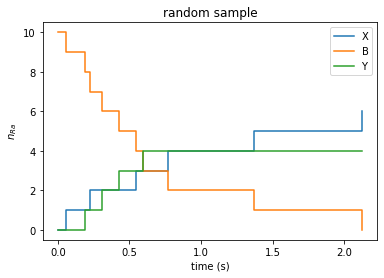

In [114]:
# generate process and initial condition for given system size
process, initial_state = process_factory(10)

# generate a random trajectory
t, states = sample(process, initial_state)

# plot trajectories of the selected species:
for species in ['X','B', 'Y']:
    plt.step(t, states[species], where='post', label=species)

plt.title("random sample")
plt.xlabel("time (s)")
plt.ylabel("$n_{Ra}$")
plt.legend();

## Trajectories of species B for different system volumes

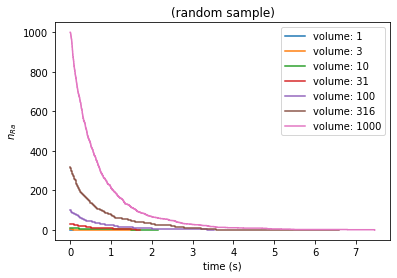

In [19]:
for size in np.logspace(0,3,7):
    process, init = process_factory(int(size))
    t, states = sample(process, init)
    plt.step(t, states['B'], where='post', label=f'volume: {int(size)}')

plt.title("(random sample)")
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("$n_{Ra}$");

## The distribution of final copy numbers of species X 

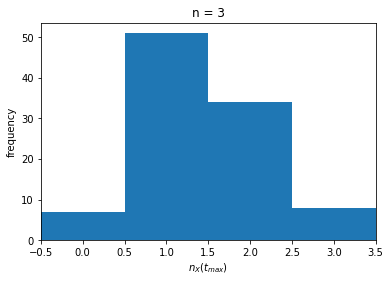

In [115]:
size = 3
repeats = 100

final_X = [sample(*process_factory(size))[1].get('X',[0])[-1] for repeat in range(repeats)]

plt.title(f"n = {size}")
plt.xlabel("$n_X(t_{max})$")
plt.ylabel("frequency")
plt.xlim(-.5,size+.5)
plt.hist(final_X, bins=size+1, range=(0,size+1), align="left", rwidth=1);

## Distribution of arrival times

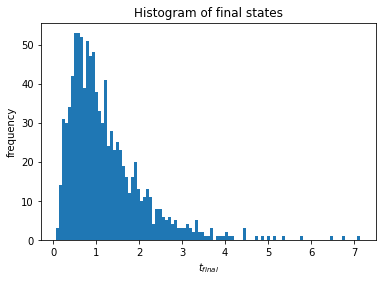

In [126]:
size = 3
repeats = 1000

t_end = [sample(*process_factory(size))[0][-1] for repeat in range(repeats)]

plt.title("Histogram of final states")
plt.xlabel("$t_{final}$")
plt.ylabel("frequency")
plt.hist(t_end, bins=101);

In [135]:
from statistics import mean, stdev
mean(t_end)

6.771431088398286

In [144]:
sizes = np.linspace(1, 1000, 21)
repeats = 50

avg_t_end = []
for size in sizes:
    t_end = [sample(*process_factory(size))[0][-1] for repeat in range(repeats)]
    avg_t_end.append(mean(t_end))

Text(0, 0.5, '<t_{end}>')

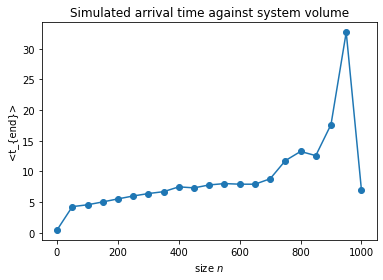

In [145]:
plt.plot(sizes, avg_t_end, 'o-')
plt.title("Simulated arrival time against system volume")
plt.xlabel('size $n$')
plt.ylabel('<t_{end}>')